<a href="https://colab.research.google.com/github/r4yd3r/Analise-de-Dados-Estruturados/blob/main/experimentos_estruturados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos para os dados estruturados

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/bootcamp/dados

/content/drive/MyDrive/Colab Notebooks/bootcamp/dados


In [ ]:
%ls

 Advertising.csv
 analisedemodelos.csv
'Blueprints for Text Analytics Using Python.pdf'
'Cópia de analisedemodelos.csv'
 dataset_titanic.csv
 decision_tree_house
 decision_tree_house.svg
 df_feature_selection.csv
'Estatistica Aplicada e Probabilidade para Engenheiros.pdf'
 fig_selecao_features.png
 log.conf.yaml
 logs.log
 relatorio_pandas_profiling.html
 tabela_com_amostras.csv
'The Elements of Data Analytic Style.pdf'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import datetime
import re
import json
import yaml
import sys
import os
import logging
import logging.config
import time
import multiprocessing
from collections import OrderedDict
import requests
import sqlalchemy
import string
import unicodedata
import yaml
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import tqdm

import numpy as np
from scipy.sparse import issparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    balanced_accuracy_score,
    average_precision_score,
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    jaccard_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
)
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, PCA

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import joblib
from joblib import delayed, Parallel

#################################
# VARIÁVEIS GLOBAIS
#################################
N_JOBS = -1
BASE_DIR = './'
DEFAULT_RANDOM_STATE = 42

#################################
# LOGS
#################################


with open(os.path.join(BASE_DIR, 'log.conf.yaml'), 'r') as f:
    config = yaml.safe_load(f.read())
    logging.config.dictConfig(config)
    
#################################
# CONFIGURAÇÕES
#################################
pd.options.display.max_rows = 500

In [ ]:
# # Leitura dos dados estruturados extraídos das denúncias. 
# # Informações completamente anonimizadas.
# df = pd.read_parquet('datasets/df_treinamento_faro.parquet')
# df['LABEL'] = df['GrauAptidao'].apply(lambda x: 1 if x > 50 else 0)
# df.drop(columns=['IdManifestacao','GrauAptidao','TxtFatoManifestacao','TextoAnexo'], inplace=True)
# df.columns = [f'F{i:>03}' for i, c in enumerate(df.columns[:-1])] + ['LABEL']

In [ ]:
# # Divisão dos dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['LABEL']), df['LABEL'], test_size=.2, random_state=DEFAULT_RANDOM_STATE, stratify=df['LABEL'])

# # altera a escala das features para um intervalo entre 0 e 1.

# X_train_original = X_train.copy()
# X_test_original = X_test.copy()

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# NUMERO_FEATURES = X_train.shape[1]

In [ ]:
# df_tmp = pd.DataFrame(X_train, columns=X_train_original.columns, index=X_train_original.index)
# df_tmp['LABEL'] = y_train
# df_tmp.to_parquet('datasets/df_train_de.parquet')

# df_tmp = pd.DataFrame(X_test, columns=X_test_original.columns, index=X_test_original.index)
# df_tmp['LABEL'] = y_test
# df_tmp.to_parquet('datasets/df_test_de.parquet')

In [ ]:
#df_train = pd.read_parquet('datasets/df_train_de.parquet')
#X_train, y_train = df_train.drop(columns=['LABEL']), df_train['LABEL']

#df_test = pd.read_parquet('datasets/df_test_de.parquet')
#X_test, y_test = df_test.drop(columns=['LABEL']), df_test['LABEL']

#NUMERO_FEATURES = X_train.shape[1]

In [4]:
# Importar dados
df = pd.read_csv("tabela_com_amostras.csv")
print("SHAPE: ",df.shape)
df.head()

SHAPE:  (106346, 85)


,masked,mean,classe_amostra,fid,MEDIA_NDVI_2015,MEDIA_NDVI_2016,MEDIA_NDVI_2017,MEDIA_NDVI_2018,MEDIA_NDVI_2019,MEDIA_NDVI_2020,MEDIA_NDVI_2021,MEDIANA_NDVI_2015,MEDIANA_NDVI_2016,MEDIANA_NDVI_2017,MEDIANA_NDVI_2018,MEDIANA_NDVI_2019,MEDIANA_NDVI_2020,MEDIANA_NDVI_2021,SD_NDVI_2015,SD_NDVI_2016,SD_NDVI_2017,SD_NDVI_2018,SD_NDVI_2019,SD_NDVI_2020,SD_NDVI_2021,MEDIA_ndwi_2015,MEDIA_ndwi_2016,MEDIA_ndwi_2017,MEDIA_ndwi_2018,MEDIA_ndwi_2019,MEDIA_ndwi_2020,MEDIA_ndwi_2021,MEDIANA_ndwi_2015,MEDIANA_ndwi_2016,MEDIANA_ndwi_2017,MEDIANA_ndwi_2018,MEDIANA_ndwi_2019,MEDIANA_ndwi_2020,MEDIANA_ndwi_2021,SD_ndwi_2015,...,SD_ndwi_2021,MEDIA_swir_2015,MEDIA_swir_2016,MEDIA_swir_2017,MEDIA_swir_2018,MEDIA_swir_2019,MEDIA_swir_2020,MEDIA_swir_2021,MEDIANA_swir_2015,MEDIANA_swir_2016,MEDIANA_swir_2017,MEDIANA_swir_2018,MEDIANA_swir_2019,MEDIANA_swir_2020,MEDIANA_swir_2021,SD_swir_2015,SD_swir_2016,SD_swir_2017,SD_swir_2018,SD_swir_2019,SD_swir_2020,SD_swir_2021,MEDIA_sentinel_2016,MEDIA_sentinel_2017,MEDIA_sentinel_2018,MEDIA_sentinel_2019,MEDIA_sentinel_2020,MEDIA_sentinel_2021,MEDIANA_sentinel_2016,MEDIANA_sentinel_2017,MEDIANA_sentinel_2018,MEDIANA_sentinel_2019,MEDIANA_sentinel_2020,MEDIANA_sentinel_2021,SD_sentinel_2016,SD_sentinel_2017,SD_sentinel_2018,SD_sentinel_2019,SD_sentinel_2020,SD_sentinel_2021
0,-1078580800,-1078580800,0.0,1,0.860178,0.862347,0.880624,0.876968,0.874338,0.866653,0.874047,0.858046,0.861705,0.880325,0.878201,0.872291,0.866706,0.873053,0.006647,0.006360,0.011249,0.010114,0.006904,0.006366,0.010788,0.411619,0.422723,0.450105,0.444348,0.440827,0.439741,0.442109,0.410668,0.418522,0.453245,0.447814,0.434582,0.439734,0.445001,0.010994,...,0.020057,0.045178,0.042401,0.040698,0.040803,0.039660,0.042483,0.041667,0.045781,0.042646,0.041203,0.040804,0.040020,0.042124,0.042578,0.002567,0.003107,0.002925,0.003616,0.002909,0.002553,0.003242,-13.824680,-13.751174,-14.481498,-14.332572,-14.025660,-14.159876,-13.930913,-13.416140,-14.576889,-14.331479,-14.260532,-14.111591,1.262125,1.072656,0.847374,0.855016,0.971473,1.250368
1,-1127396665,-1127396665,NaN,2,0.826198,0.861789,0.858303,0.876121,0.843605,0.857290,0.857423,0.831246,0.865362,0.854957,0.871255,0.838356,0.863312,0.863969,0.013040,0.009522,0.005938,0.011277,0.010649,0.013060,0.012535,0.391470,0.404147,0.387315,0.421452,0.408952,0.436466,0.418396,0.382412,0.402343,0.372811,0.408203,0.421082,0.433053,0.406094,0.018645,...,0.041569,0.041624,0.038145,0.036294,0.034337,0.038773,0.035162,0.037316,0.040515,0.036830,0.036060,0.034039,0.036390,0.037834,0.039621,0.003808,0.005408,0.005250,0.005595,0.005490,0.004892,0.005395,-16.607193,-17.103259,-17.925755,-17.880660,-18.054371,-17.233654,-16.343923,-16.892206,-17.808227,-17.220579,-17.949005,-17.016452,0.750684,0.929176,0.729162,1.902690,1.337784,0.713757
2,231191332,231191332,0.0,3,0.835334,0.842979,0.841535,0.840028,0.818171,0.834221,0.846946,0.830686,0.840736,0.852647,0.845784,0.845801,0.840803,0.858806,0.014755,0.012962,0.019986,0.014076,0.059527,0.018637,0.026971,0.414819,0.414943,0.406116,0.411079,0.407709,0.403399,0.404860,0.409810,0.419160,0.412292,0.406481,0.416200,0.409798,0.426004,0.009141,...,0.037577,0.037229,0.033988,0.033282,0.033755,0.031422,0.035098,0.032581,0.035785,0.034809,0.034011,0.032623,0.033915,0.035758,0.034231,0.002828,0.001943,0.002006,0.002490,0.004901,0.002180,0.003521,-15.849317,-15.879657,-15.904003,-15.790441,-15.811666,-16.635458,-15.969233,-15.560113,-15.598380,-15.491156,-15.833027,-16.086756,0.629769,0.801905,0.760380,2.286041,1.119886,1.935816
3,-1127396665,-1127396665,NaN,4,0.840929,0.840058,0.832866,0.846502,0.839763,0.830259,0.850966,0.840929,0.840058,0.832866,0.846502,0.839763,0.830259,0.850966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398562,0.384476,0.384224,0.406581,0.438750,0.454734,0.452517,0.398562,0.384476,0.384224,0.406581,0.438750,0.454734,0.452517,NaN,...,NaN,0.039717,0.035634,0.034644,0.033571,0.038178,0.032196,0.032609,0.039717,0.035634,0.034644,0.033571,0.038178,0.032196,0.032609,NaN,NaN,Na

In [5]:
# Ler dados previsão
df = df.drop(columns=["MEDIA_sentinel_2016",	"MEDIA_sentinel_2017",	"MEDIA_sentinel_2018",	"MEDIA_sentinel_2019",	"MEDIA_sentinel_2020",
                 "MEDIA_sentinel_2021",	"MEDIANA_sentinel_2016", "MEDIANA_sentinel_2017",	"MEDIANA_sentinel_2018", 
                 "MEDIANA_sentinel_2019",	"MEDIANA_sentinel_2020",	"MEDIANA_sentinel_2021"])
df=df.drop(columns=["SD_NDVI_2015","SD_NDVI_2016","SD_NDVI_2017","SD_NDVI_2018","SD_NDVI_2019","SD_NDVI_2020","SD_NDVI_2021"])
df=df.drop(columns=["SD_ndwi_2015","SD_ndwi_2016","SD_ndwi_2017","SD_ndwi_2018","SD_ndwi_2019","SD_ndwi_2020","SD_ndwi_2021"])
df=df.drop(columns=["SD_swir_2015","SD_swir_2016","SD_swir_2017","SD_swir_2018","SD_swir_2019","SD_swir_2020","SD_swir_2021"])
df=df.drop(columns=["SD_sentinel_2016","SD_sentinel_2017","SD_sentinel_2018","SD_sentinel_2019","SD_sentinel_2020","SD_sentinel_2021"])

In [ ]:
dados_previsao=df.iloc[:,2:]
dados_previsao=dados_previsao[pd.isna(dados_previsao['classe_amostra'])==True]
dados_previsao=dados_previsao.fillna(dados_previsao.mean())
dados_previsao.shape

(74346, 44)

In [6]:
# Ler dados treinamento
df2=df.iloc[:,2:]
treinamento=df2[pd.isna(df2['classe_amostra'])==False]
y=treinamento['classe_amostra']
treinamento=treinamento.drop(columns=['classe_amostra'])
treinamento=treinamento.fillna(treinamento.mean())
treinamento.shape

[2021-12-14 10:40:55,907][utils.py:_init_num_threads:157 INFO] NumExpr defaulting to 2 threads.


(32000, 43)

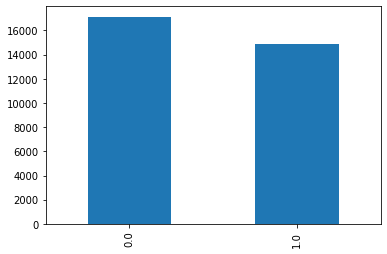

In [7]:
# Criar gráficos estatísticos
y.value_counts().plot(kind="bar")
plt.show()

In [8]:
# atribuir os valores das variáveis independentes a 'X'
X=treinamento.drop(columns='fid')
y=y

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
NUMERO_FEATURES = X_train.shape[1]

In [10]:
X_train.shape[1]

42

In [20]:
xgb.DMatrix((y))

In [24]:
#como dito anteriormente, precisamos converter nosso Dataset para Dmatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test, label=y_test)


In [25]:
#primeiro conjunto de parâmetros (sem tunar)
params = {
    # Parâmetros que serão refinados
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Tipo do problema
    'objective':'binary:hinge',
    # Método de avaliação 
    'eval_metric' : 'auc',
}

In [27]:
#usando o primeiro set de parâmetros
num_boost_round = 1000
first_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100 
)

[0]	Test-auc:0.5
Will train until Test-auc hasn't improved in 100 rounds.
[1]	Test-auc:0.878623
[2]	Test-auc:0.911964
[3]	Test-auc:0.91816
[4]	Test-auc:0.919653
[5]	Test-auc:0.920405
[6]	Test-auc:0.920406
[7]	Test-auc:0.91987
[8]	Test-auc:0.919993
[9]	Test-auc:0.920372
[10]	Test-auc:0.920393
[11]	Test-auc:0.920459
[12]	Test-auc:0.920623
[13]	Test-auc:0.920981
[14]	Test-auc:0.920388
[15]	Test-auc:0.920971
[16]	Test-auc:0.920731
[17]	Test-auc:0.921053
[18]	Test-auc:0.921053
[19]	Test-auc:0.921441
[20]	Test-auc:0.921569
[21]	Test-auc:0.921569
[22]	Test-auc:0.92139
[23]	Test-auc:0.920956
[24]	Test-auc:0.921037
[25]	Test-auc:0.921017
[26]	Test-auc:0.920843
[27]	Test-auc:0.920859
[28]	Test-auc:0.920746
[29]	Test-auc:0.920169
[30]	Test-auc:0.920057
[31]	Test-auc:0.920103
[32]	Test-auc:0.919863
[33]	Test-auc:0.920087
[34]	Test-auc:0.919893
[35]	Test-auc:0.919668
[36]	Test-auc:0.91999
[37]	Test-auc:0.919863
[38]	Test-auc:0.91975
[39]	Test-auc:0.92023
[40]	Test-auc:0.920118
[41]	Test-auc:0.92001

In [33]:
#refinando max_depth e min_child_weight
#lista contendo todas as combinações de max_depth e min_child_weight que queremos tentar. 
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(1,10)
]
# Definindo os valores iniciais de score, para podermos salvar o melhor AUC score e a combinação de parâmetros correspondente
max_auc = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
  
    # Atualizando os parâmetros do dicionário params, conforme os valores da iteração atual
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    
    
    # Executando a função .cv
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round, 
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    
    # Pegando o melhor resultado AUC da cross validation
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].values.argmax()
    #print("\tAUC {} com {} rounds".format( boost_rounds))
    print("\tauc {} for {} rounds\n".format(mean_auc, boost_rounds))
    #print(str(boost_rounds))    
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth,min_child_weight)
        
print("Best params: {},{}, auc: {}".format(best_params[0], best_params[1], max_auc))

	auc 0.9083401999999999 for 7 rounds

	auc 0.9107744 for 8 rounds

	auc 0.909567 for 6 rounds

	auc 0.9099614 for 9 rounds

	auc 0.9114793999999999 for 9 rounds

	auc 0.912399 for 7 rounds

	auc 0.9116306 for 7 rounds

	auc 0.913409 for 7 rounds

	auc 0.912524 for 7 rounds

	auc 0.9065125999999999 for 5 rounds

	auc 0.9084353999999999 for 9 rounds

	auc 0.9084464000000001 for 7 rounds

	auc 0.9113438 for 7 rounds

	auc 0.9098074 for 5 rounds

	auc 0.9108606 for 8 rounds

	auc 0.9123094 for 7 rounds

	auc 0.9127063999999999 for 7 rounds

	auc 0.9113332 for 5 rounds

	auc 0.9069664 for 5 rounds

	auc 0.9058976 for 7 rounds

	auc 0.9079493999999999 for 7 rounds

	auc 0.9090966000000001 for 9 rounds

	auc 0.9088901999999999 for 6 rounds

	auc 0.9080692000000001 for 8 rounds

	auc 0.9099918 for 6 rounds

	auc 0.9116306 for 6 rounds

	auc 0.911706 for 9 rounds

Best params: 9,8, auc: 0.913409


In [35]:
#atualizando nossos parâmetros base:
params['max_depth'] = best_params[0] #9
params['min_child_weight'] = best_params[1] #2

In [41]:
#Lista com a combinação de valores dos parâmetros
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
max_auc = float(0)
best_params = None
# Começamos pelos maiores valores até chegarmos nos menores
for subsample, colsample in reversed(gridsearch_params):
  # Atualizando os parâmetros
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Executando .cv
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    # Pegando o melhor resultado AUC da cross validation
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].values.argmax()
    #print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], mean_auc))    
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)
print("Best params: {}, {}, auc: {}".format(best_params[0], best_params[1], max_auc))

Best params: 0.9, 0.7, auc: 0.916385


In [43]:
#parâmetros finais
params = {'colsample_bytree': 0.9,
 'eta': 0.005,
 'eval_metric': 'auc',
 'max_depth': 9,
 'min_child_weight': 2,
 'objective': 'binary:hinge',
 'subsample': 0.8}

In [44]:
num_boost_round = 1000
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

[0]	Test-auc:0.5
Will train until Test-auc hasn't improved in 100 rounds.
[1]	Test-auc:0.5
[2]	Test-auc:0.5
[3]	Test-auc:0.5
[4]	Test-auc:0.5
[5]	Test-auc:0.5
[6]	Test-auc:0.5
[7]	Test-auc:0.5
[8]	Test-auc:0.5
[9]	Test-auc:0.5
[10]	Test-auc:0.5
[11]	Test-auc:0.5
[12]	Test-auc:0.5
[13]	Test-auc:0.5
[14]	Test-auc:0.5
[15]	Test-auc:0.5
[16]	Test-auc:0.5
[17]	Test-auc:0.5
[18]	Test-auc:0.5
[19]	Test-auc:0.5
[20]	Test-auc:0.5
[21]	Test-auc:0.5
[22]	Test-auc:0.5
[23]	Test-auc:0.5
[24]	Test-auc:0.5
[25]	Test-auc:0.5
[26]	Test-auc:0.5
[27]	Test-auc:0.5
[28]	Test-auc:0.5
[29]	Test-auc:0.5
[30]	Test-auc:0.5
[31]	Test-auc:0.5
[32]	Test-auc:0.5
[33]	Test-auc:0.5
[34]	Test-auc:0.5
[35]	Test-auc:0.5
[36]	Test-auc:0.5
[37]	Test-auc:0.5
[38]	Test-auc:0.5
[39]	Test-auc:0.5
[40]	Test-auc:0.5
[41]	Test-auc:0.5
[42]	Test-auc:0.5
[43]	Test-auc:0.5
[44]	Test-auc:0.5
[45]	Test-auc:0.5
[46]	Test-auc:0.5
[47]	Test-auc:0.5
[48]	Test-auc:0.5
[49]	Test-auc:0.5
[50]	Test-auc:0.5
[51]	Test-auc:0.5
[52]	Test-auc:0.5

In [45]:
num_boost_round = 323 #(soma-se 1)
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-auc:0.5
[1]	Test-auc:0.5
[2]	Test-auc:0.5
[3]	Test-auc:0.5
[4]	Test-auc:0.5
[5]	Test-auc:0.5
[6]	Test-auc:0.5
[7]	Test-auc:0.5
[8]	Test-auc:0.5
[9]	Test-auc:0.5
[10]	Test-auc:0.5
[11]	Test-auc:0.5
[12]	Test-auc:0.5
[13]	Test-auc:0.5
[14]	Test-auc:0.5
[15]	Test-auc:0.5
[16]	Test-auc:0.5
[17]	Test-auc:0.5
[18]	Test-auc:0.5
[19]	Test-auc:0.5
[20]	Test-auc:0.5
[21]	Test-auc:0.5
[22]	Test-auc:0.5
[23]	Test-auc:0.5
[24]	Test-auc:0.5
[25]	Test-auc:0.5
[26]	Test-auc:0.5
[27]	Test-auc:0.5
[28]	Test-auc:0.5
[29]	Test-auc:0.5
[30]	Test-auc:0.5
[31]	Test-auc:0.5
[32]	Test-auc:0.5
[33]	Test-auc:0.5
[34]	Test-auc:0.5
[35]	Test-auc:0.5
[36]	Test-auc:0.5
[37]	Test-auc:0.5
[38]	Test-auc:0.5
[39]	Test-auc:0.5
[40]	Test-auc:0.5
[41]	Test-auc:0.5
[42]	Test-auc:0.5
[43]	Test-auc:0.5
[44]	Test-auc:0.5
[45]	Test-auc:0.5
[46]	Test-auc:0.5
[47]	Test-auc:0.5
[48]	Test-auc:0.5
[49]	Test-auc:0.5
[50]	Test-auc:0.5
[51]	Test-auc:0.5
[52]	Test-auc:0.5
[53]	Test-auc:0.5
[54]	Test-auc:0.5
[55]	Test-auc:0.5
[5

In [69]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.gridspec as gridspec
import itertools 
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [70]:
# Só funciona para duas features por vez
X_train_ml = X_train[['MEDIA_NDVI_2015','MEDIA_NDVI_2020']].values
y_train_ml =  y_train.values.astype(np.integer)

In [71]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = DecisionTreeClassifier(random_state=0)


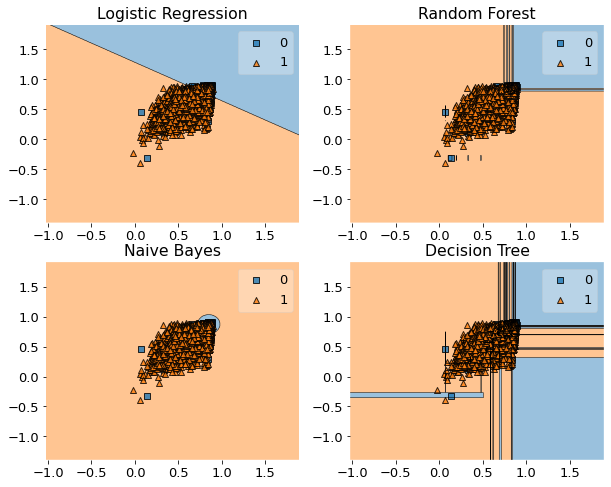

In [72]:
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)

# Escolha de features

In [ ]:
# métricas utilizadas para avaliação
metrics = ['average_precision','balanced_accuracy','roc_auc']

k_vs_avg_prec_score = []
k_vs_bal_acc_score = []
k_vs_roc_auc_score = []

# cálculo do peso para a classe positiva (utilizado em algoritmos que podem lidar com o dataset desbalanceado)
POS_WEIGHT = y_train.value_counts()[0]/y_train.value_counts()[1]
class_weight = {0: 1, 1: POS_WEIGHT}

for k in tqdm.tqdm_notebook(range(2, NUMERO_FEATURES + 1, 2)):
    
    # seleciona k features utilizando SelectFromModel(RandomForestClassifier)
    selector = SelectFromModel(
        RandomForestClassifier(
            n_estimators=500, 
            class_weight=class_weight, 
            random_state=DEFAULT_RANDOM_STATE, 
            n_jobs=N_JOBS), 
        max_features=k, 
        threshold=-np.inf)
    selector.fit(X_train, y_train)
    
    # transforma o dataset para preservar apenas as features selecionadas
    X_train_fs = selector.transform(X_train)
    
    # realiza validação cruzada com 10 folds estratificados
    rskfcv = RepeatedStratifiedKFold(
        n_splits=10, 
        n_repeats=1, 
        random_state=DEFAULT_RANDOM_STATE)
    
    valores = cross_validate(
        RandomForestClassifier(
            n_estimators=500, 
            class_weight=class_weight, 
            random_state=DEFAULT_RANDOM_STATE, 
            n_jobs=N_JOBS), 
        X_train_fs, 
        y_train, 
        scoring=metrics, 
        cv=rskfcv, 
        n_jobs=N_JOBS
    )
    cv_scores = {k[5:]: np.mean(v) for k, v in valores.items() if k not in ['fit_time', 'score_time']}
    avg_prec, bal_acc, roc_auc = cv_scores['average_precision'],cv_scores['balanced_accuracy'],cv_scores['roc_auc']
    
    logging.info("k = {} - average_precision = {} - balanced_accuracy = {} - roc_auc_score = {}".format(k, avg_prec, bal_acc, roc_auc))
    
    k_vs_avg_prec_score.append(avg_prec)
    k_vs_bal_acc_score.append(bal_acc)
    k_vs_roc_auc_score.append(roc_auc)

In [75]:
# métricas utilizadas para avaliação
metrics = ['average_precision','balanced_accuracy','roc_auc']

k_vs_avg_prec_score = []
k_vs_bal_acc_score = []
k_vs_roc_auc_score = []

# cálculo do peso para a classe positiva (utilizado em algoritmos que podem lidar com o dataset desbalanceado)
POS_WEIGHT = y_train.value_counts()[0]/y_train.value_counts()[1]
class_weight = {0: 1, 1: POS_WEIGHT}

for k in tqdm.tqdm_notebook(range(2, NUMERO_FEATURES + 1, 2)):
    
    # seleciona k features utilizando SelectFromModel(XGBClassifier)
    selector = SelectFromModel(
        XGBClassifier(
            n_estimators=100, 
            class_weight=class_weight, 
            random_state=DEFAULT_RANDOM_STATE, 
            n_jobs=N_JOBS), 
        max_features=k, 
        threshold=-np.inf)
    selector.fit(X_train, y_train)
    
    # transforma o dataset para preservar apenas as features selecionadas
    X_train_fs = selector.transform(X_train)
    
    # realiza validação cruzada com 10 folds estratificados
    rskfcv = RepeatedStratifiedKFold(
        n_splits=10, 
        n_repeats=1, 
        random_state=DEFAULT_RANDOM_STATE)
    
    valores = cross_validate(
        XGBClassifier(
            n_estimators=100, 
            class_weight=class_weight, 
            random_state=DEFAULT_RANDOM_STATE, 
            n_jobs=N_JOBS), 
        X_train_fs, 
        y_train, 
        scoring=metrics, 
        cv=rskfcv, 
        n_jobs=N_JOBS
    )
    cv_scores = {k[5:]: np.mean(v) for k, v in valores.items() if k not in ['fit_time', 'score_time']}
    avg_prec, bal_acc, roc_auc = cv_scores['average_precision'],cv_scores['balanced_accuracy'],cv_scores['roc_auc']
    
    logging.info("k = {} - average_precision = {} - balanced_accuracy = {} - roc_auc_score = {}".format(k, avg_prec, bal_acc, roc_auc))

    k_vs_avg_prec_score.append(avg_prec)
    k_vs_bal_acc_score.append(bal_acc)
    k_vs_roc_auc_score.append(roc_auc)


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-12-14 12:53:23,726][<ipython-input-75-4f1c0dce5a58>:<module>:49 INFO] k = 2 - average_precision = 0.9487615722484642 - balanced_accuracy = 0.9040687629526472 - roc_auc_score = 0.951198415933965
[2021-12-14 12:53:37,638][<ipython-input-75-4f1c0dce5a58>:<module>:49 INFO] k = 4 - average_precision = 0.9505111332227589 - balanced_accuracy = 0.9045056860945756 - roc_auc_score = 0.9530861970436002
[2021-12-14 12:53:53,913][<ipython-input-75-4f1c0dce5a58>:<module>:49 INFO] k = 6 - average_precision = 0.957419987537989 - balanced_accuracy = 0.9121084616700668 - roc_auc_score = 0.961083514599634
[2021-12-14 12:54:12,699][<ipython-input-75-4f1c0dce5a58>:<module>:49 INFO] k = 8 - average_precision = 0.9601748270904773 - balanced_accuracy = 0.913136683391017 - roc_auc_score = 0.9647027098511186
[2021-12-14 12:54:33,953][<ipython-input-75-4f1c0dce5a58>:<module>:49 INFO] k = 10 - average_precision = 0.9606186314348403 - balanced_accuracy = 0.9140819813575904 - roc_auc_score = 0.965767217239609

In [76]:
# resumo das métricas
df_feature_selection = pd.DataFrame({
    'Número de Features': range(2, NUMERO_FEATURES + 1, 2),
    'Average Precision': k_vs_avg_prec_score,
    'Balanced Accuracy': k_vs_bal_acc_score,
    'ROC AUC': k_vs_roc_auc_score,
})

df_feature_selection[df_feature_selection['Número de Features']%10==0].reset_index(drop=True)
df_feature_selection.to_csv("df_feature_selection.csv")

In [77]:
X_train.shape[1]

42

In [11]:
df_feature_selection = pd.read_csv("df_feature_selection.csv")


In [12]:
df_feature_selection.head()

,Unnamed: 0,Número de Features,Average Precision,Balanced Accuracy,ROC AUC
0,0,2,0.914129,0.875441,0.922087
1,1,4,0.936137,0.898568,0.941990
2,2,6,0.948786,0.908386,0.954732
3,3,8,0.950534,0.908859,0.956603
4,4,10,0.950672,0.908759,0.956383


In [13]:
# criar modo de leitura para df_feature_selection
df_feature_selection = pd.read_csv("df_feature_selection.csv")
NUMERO_FEATURES = df_feature_selection['Número de Features']
k_vs_avg_prec_score = df_feature_selection['Average Precision']
k_vs_bal_acc_score =  df_feature_selection['Balanced Accuracy']
k_vs_roc_auc_score =  df_feature_selection['ROC AUC']

In [ ]:
k_vs_roc_auc_score

0     0.922087
1     0.941990
2     0.954732
3     0.956603
4     0.956383
5     0.958056
6     0.961311
7     0.961839
8     0.966939
9     0.967120
10    0.968093
11    0.968274
12    0.968689
13    0.968896
14    0.969093
15    0.969359
16    0.969330
17    0.969490
18    0.969497
19    0.969466
20    0.969649
Name: ROC AUC, dtype: float64

In [ ]:
NUMERO_FEATURES

0      2
1      4
2      6
3      8
4     10
5     12
6     14
7     16
8     18
9     20
10    22
11    24
12    26
13    28
14    30
15    32
16    34
17    36
18    38
19    40
20    42
Name: Número de Features, dtype: int64

In [78]:
df_feature_selection

,Número de Features,Average Precision,Balanced Accuracy,ROC AUC
0,2,0.948762,0.904069,0.951198
1,4,0.950511,0.904506,0.953086
2,6,0.957420,0.912108,0.961084
3,8,0.960175,0.913137,0.964703
4,10,0.960619,0.914082,0.965767
5,12,0.961016,0.914124,0.965964
6,14,0.962101,0.914505,0.966189
7,16,0.962182,0.915422,0.966463
8,18,0.962539,0.914862,0.966615
9,20,0.962473,0.915379,0.966583


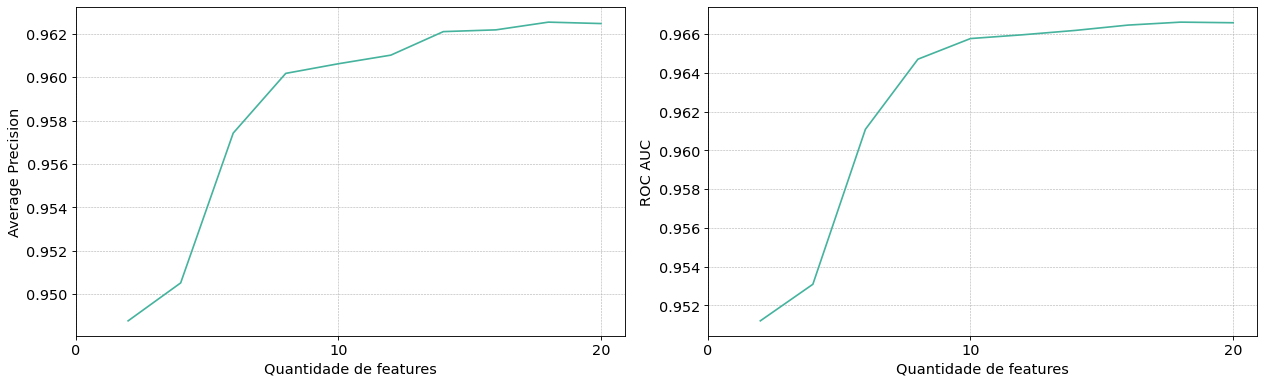

In [79]:
# gráfico com as métricas

tamanho_vetores = range(2, 20 + 1, 2)

NUMERO_FEATURES = 20

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1,2, figsize=(16, 5), dpi=80)
t = list(range(0, NUMERO_FEATURES + 1, 10))

pd.Series(k_vs_avg_prec_score[0:],index=tamanho_vetores).plot(color='#45B39D', ax=ax[0])
ax[0].set_xlabel('Quantidade de features')
ax[0].set_ylabel('Average Precision')
ax[0].grid(which='major',linestyle='--', linewidth=0.5)
ax[0].set_xticks(t)

pd.Series(k_vs_roc_auc_score[0:],index=tamanho_vetores).plot(color='#45B39D', ax=ax[1])
ax[1].set_xlabel('Quantidade de features')
ax[1].set_ylabel('ROC AUC')
ax[1].grid(which='major',linestyle='--', linewidth=0.5)
ax[1].set_xticks(t)
plt.tight_layout()
plt.savefig('./fig_selecao_features.png')
plt.show()

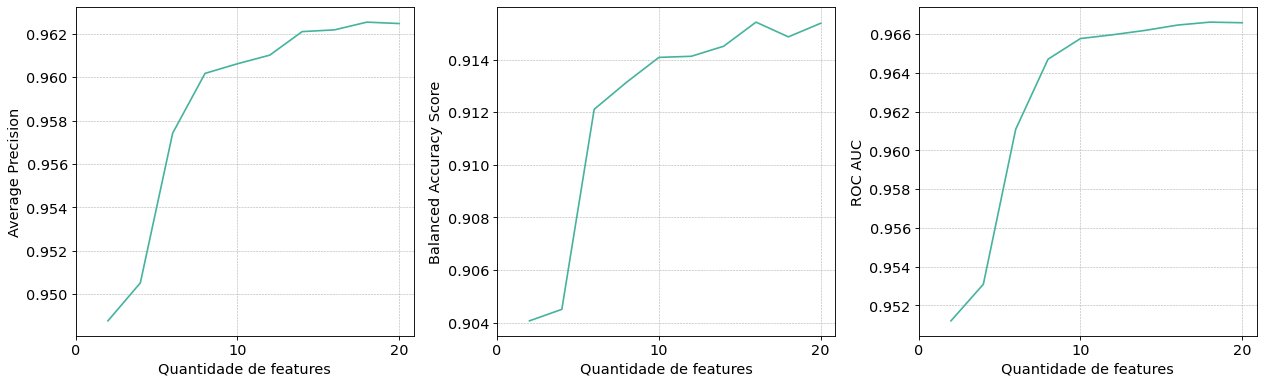

In [80]:
# gráfico com as métricas

tamanho_vetores = range(2, NUMERO_FEATURES + 1, 2)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1,3, figsize=(16, 5), dpi=80)
t = list(range(0, NUMERO_FEATURES + 1, 10))

pd.Series(k_vs_avg_prec_score[0:],index=tamanho_vetores).plot(color='#45B39D', ax=ax[0])
ax[0].set_xlabel('Quantidade de features')
ax[0].set_ylabel('Average Precision')
ax[0].grid(which='major',linestyle='--', linewidth=0.5)
ax[0].set_xticks(t)

pd.Series(k_vs_bal_acc_score[0:],index=tamanho_vetores).plot(color='#45B39D', ax=ax[1])
ax[1].set_xlabel('Quantidade de features')
ax[1].set_ylabel('Balanced Accuracy Score')
ax[1].grid(which='major',linestyle='--', linewidth=0.5)
ax[1].set_xticks(t)

pd.Series(k_vs_roc_auc_score[0:],index=tamanho_vetores).plot(color='#45B39D', ax=ax[2])
ax[2].set_xlabel('Quantidade de features')
ax[2].set_ylabel('ROC AUC')
ax[2].grid(which='major',linestyle='--', linewidth=0.5)
ax[2].set_xticks(t)
plt.tight_layout()
plt.show()

# Escolha de um modelo

In [ ]:
%pwd

In [81]:
# seleciona k features utilizando SelectFromModel(RandomForestClassifier)

k = 42

selector_model=XGBClassifier(
    n_estimators=100, 
    random_state=DEFAULT_RANDOM_STATE, 
    n_jobs=N_JOBS)

selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)
selector.fit(X_train, y_train)

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [82]:
X_train.shape

(22400, 42)

In [83]:
 #df_results = pd.read_csv("analisedemodelos.csv")

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [84]:

# realiza testes com validação cruzada para a escolha do modelo

metrics = ['roc_auc','balanced_accuracy', 'average_precision', 'recall', 'accuracy', 'f1_macro','f1_weighted']

results = [
    
]

model = [
    RandomForestClassifier,
    LogisticRegression,
    XGBClassifier,
    KNeighborsClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    SGDClassifier,
    SVC, 
    NuSVC, 
    LinearSVC,
    BernoulliNB, 
    LGBMClassifier,
    MLPClassifier,
    AdaBoostClassifier,
]


params = [
    {
        'n_estimators': [100],
        'max_depth': [5,7,9],
        'min_samples_split': [2,3],
        'min_samples_leaf': [1,2],
        'random_state': [DEFAULT_RANDOM_STATE],
        'max_samples': [.8, 1],
    },
    {
        'penalty' : ['l2'],
        'C' : [1],
        'solver' : ['liblinear'],
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'learning_rate': [0.01],
        'n_estimators': [100],
        'subsample' : [.8,.45],
        'min_child_weight': [1],
        'max_depth': [3,4,7],
        'random_state': [DEFAULT_RANDOM_STATE],
        'reg_lambda': [2],
    },
    {
        'n_neighbors' : [5,7,9,11],
    },
    {
        'n_estimators': [100],
        'max_samples': [.8],
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'n_estimators': [100],
        'max_samples' : [.8],
        'max_depth': [6,7],
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'gamma': ['auto'],
        'C': [0.5],
    },
    {
        'gamma': ['auto'],
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
    },
    {
        'n_estimators': [100],
        'subsample': [.6,.7,.8,1],
        'random_state': [DEFAULT_RANDOM_STATE],
    },
    {
        'alpha': [1], 
        'max_iter': [100],
    },
    {
    }
]

import pdb

logging.info('Início')

# itera a lista de modelos e seus hiperparâmetros
lista_mh = list(zip(model, params))

df_results = pd.DataFrame(results)

for m, p in tqdm.tqdm_notebook(lista_mh):
    logging.info('Modelo: {}'.format(m.__name__))
    
    rskfcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=DEFAULT_RANDOM_STATE)
    
    # utiliza o HalvingGridSearchCV para encontrar o melhor conjunto de hiperparâmetros 
    # que maximizem o roc_auc score
    cv = HalvingGridSearchCV(estimator=m(),param_grid=p, n_jobs=N_JOBS, error_score=0, refit=True, scoring='roc_auc', cv=rskfcv, verbose=100)
    cv.fit(X_train, y_train)
    model = cv.best_estimator_
    best_params = cv.best_params_
    
    # instancia o modelo com os hiperparâmetros escolhidos acima e utiliza validação cruzada 
    # para avaliar todas as métricas escolhidas
    valores = cross_validate(m(**best_params), X_train, y_train, scoring=metrics, cv=rskfcv)
    cv_scores = {k[5:]: np.mean(v) for k, v in valores.items() if k not in ['fit_time', 'score_time']}
    
    # monta um registro com todas as informações coletadas para comparação
    linha = {
        'Modelo': m.__name__,
        'ScoreTreino': cv.score(X_train, y_train),
        'BestParams': best_params,
        'RawScores': {k[5:]: v for k, v in valores.items() if k not in ['fit_time', 'score_time']}
    }
    linha.update(cv_scores)
    results.append(linha)

    #df_results.sort_values('roc_auc', ascending=False)
    df_results.to_csv("analisedemodelos.csv")
    #df_results.outfile.close() 
    

[2021-12-14 13:02:37,584][<ipython-input-84-dc12138cb5d1>:<module>:97 INFO] Início


  0%|          | 0/14 [00:00<?, ?it/s]

[2021-12-14 13:02:37,623][<ipython-input-84-dc12138cb5d1>:<module>:105 INFO] Modelo: RandomForestClassifier
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2488
max_resources_: 22400
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 2488
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 1
n_candidates: 8
n_resources: 7464
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 2
n_candidates: 3
n_resources: 22392
Fitting 10 folds for each of 3 candidates, totalling 30 fits
[2021-12-14 13:10:25,289][<ipython-input-84-dc12138cb5d1>:<module>:105 INFO] Modelo: LogisticRegression
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 22400
max_resources_: 22400
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 22400
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[2021-12-14 13:10:30,157][<i

In [85]:
    df_results = pd.DataFrame(results)
    df_results.sort_values('roc_auc', ascending=False)
    df_results.to_csv("analisedemodelos.csv")
    #df_results.outfile.close() 

In [ ]:
# criar modo de leitura para df_feature_selection
df_results = pd.read_csv("analisedemodelos.csv")

In [96]:
# criar modo de leitura para df_feature_selection
df_results.sort_values('roc_auc', ascending=False)

,Modelo,ScoreTreino,BestParams,RawScores,roc_auc,balanced_accuracy,average_precision,recall,accuracy,f1_macro,f1_weighted
11,LGBMClassifier,0.990823,"{'n_estimators': 100, 'random_state': 42, 'sub...","{'roc_auc': [0.965585904678603, 0.975923349441...",0.969193,0.917453,0.964671,0.914234,0.917679,0.917305,0.917688
4,BaggingClassifier,0.999990,"{'max_samples': 0.8, 'n_estimators': 100, 'ran...","{'roc_auc': [0.9633391564561772, 0.97236739980...",0.967190,0.917009,0.959625,0.913180,0.917277,0.916896,0.917284
0,RandomForestClassifier,0.980768,"{'max_depth': 9, 'max_samples': 0.8, 'min_samp...","{'roc_auc': [0.9630868478322685, 0.97316157123...",0.967020,0.916652,0.963283,0.910877,0.917054,0.916648,0.917049
2,XGBClassifier,0.974149,"{'learning_rate': 0.01, 'max_depth': 7, 'min_c...","{'roc_auc': [0.9622073720575007, 0.97276548674...",0.966044,0.916706,0.961674,0.911069,0.917098,0.916694,0.917095
5,ExtraTreesClassifier,0.963467,"{'max_depth': 7, 'max_samples': 0.8, 'n_estima...","{'roc_auc': [0.955336968179477, 0.969227959640...",0.960717,0.907956,0.958225,0.883631,0.909643,0.908939,0.909492
13,AdaBoostClassifier,0.962527,{},"{'roc_auc': [0.9532307919046579, 0.96167311855...",0.958158,0.901459,0.952782,0.885167,0.902589,0.901968,0.902505
3,KNeighborsClassifier,0.978672,{'n_neighbors': 11},"{'roc_auc': [0.9490721049988347, 0.96584141722...",0.957937,0.911268,0.939516,0.898021,0.912187,0.911664,0.912133
9,LinearSVC,0.956384,{'random_state': 42},"{'roc_auc': [0.950143815915628, 0.961947854615...",0.955991,0.884484,0.953811,0.821659,0.888839,0.887070,0.888047
6,SGDClassifier,0.953593,{'random_state': 42},"{'roc_auc': [0.9466747725818221, 0.96105075728...",0.953362,0.890285,0.952633,0.837101,0.893973,0.892495,0.893360
1,LogisticRegression,0.953239,"{'C': 1, 'penalty': 'l2', 'random_state': 42, ...","{'roc_auc': [0.9459034290744439, 0.96065347132...",0.952675,0.882634,0.952014,0.818876,0.887054,0.885235,0.886233


In [88]:
pd.DataFrame({m: s for m, s in zip(df_results['Modelo'], df_results['RawScores'].apply(lambda x: x[m]))})

,RandomForestClassifier,LogisticRegression,XGBClassifier,KNeighborsClassifier,BaggingClassifier,ExtraTreesClassifier,SGDClassifier,SVC,NuSVC,LinearSVC,BernoulliNB,LGBMClassifier,MLPClassifier,AdaBoostClassifier
0,0.908018,0.875274,0.907556,0.902595,0.907137,0.899815,0.891182,0.875296,0.829174,0.873889,0.757778,0.910714,0.879709,0.895020
1,0.924154,0.897221,0.926828,0.924125,0.921463,0.921361,0.901738,0.893043,0.843678,0.898104,0.771202,0.926834,0.892619,0.910714
2,0.916997,0.889551,0.917885,0.913826,0.917912,0.910638,0.903374,0.882239,0.836108,0.891330,0.782194,0.915238,0.891956,0.903076
3,0.915212,0.892867,0.914776,0.909404,0.912562,0.910652,0.893205,0.890647,0.851041,0.896466,0.788621,0.914780,0.889692,0.905769
4,0.919136,0.887455,0.919599,0.915955,0.919599,0.908249,0.893496,0.882010,0.844857,0.888394,0.768209,0.924526,0.890460,0.906093
5,0.915575,0.880627,0.912458,0.909751,0.917386,0.902403,0.893275,0.875660,0.835889,0.880627,0.774721,0.917386,0.876099,0.898967
6,0.920975,0.884354,0.922317,0.915562,0.927220,0.910077,0.900541,0.880315,0.839317,0.884314,0.776610,0.918311,0.878869,0.907465
7,0.916993,0.893185,0.916087,0.911602,0.915212,0.912867,0.900464,0.889986,0.836322,0.894570,0.769368,0.915669,0.896577,0.901336
8,0.913788,0.877347,0.913345,0.902516,0.912902,0.901993,0.876248,0.872788,0.826772,0.880583,0.764096,0.915132,0.871397,0.890346
9,0.919643,0.884452,0.920097,0.915992,0.921443,0.916864,0.880075,0.883533,0.846778,0.892190,0.779808,0.918290,0.890476,0.906267


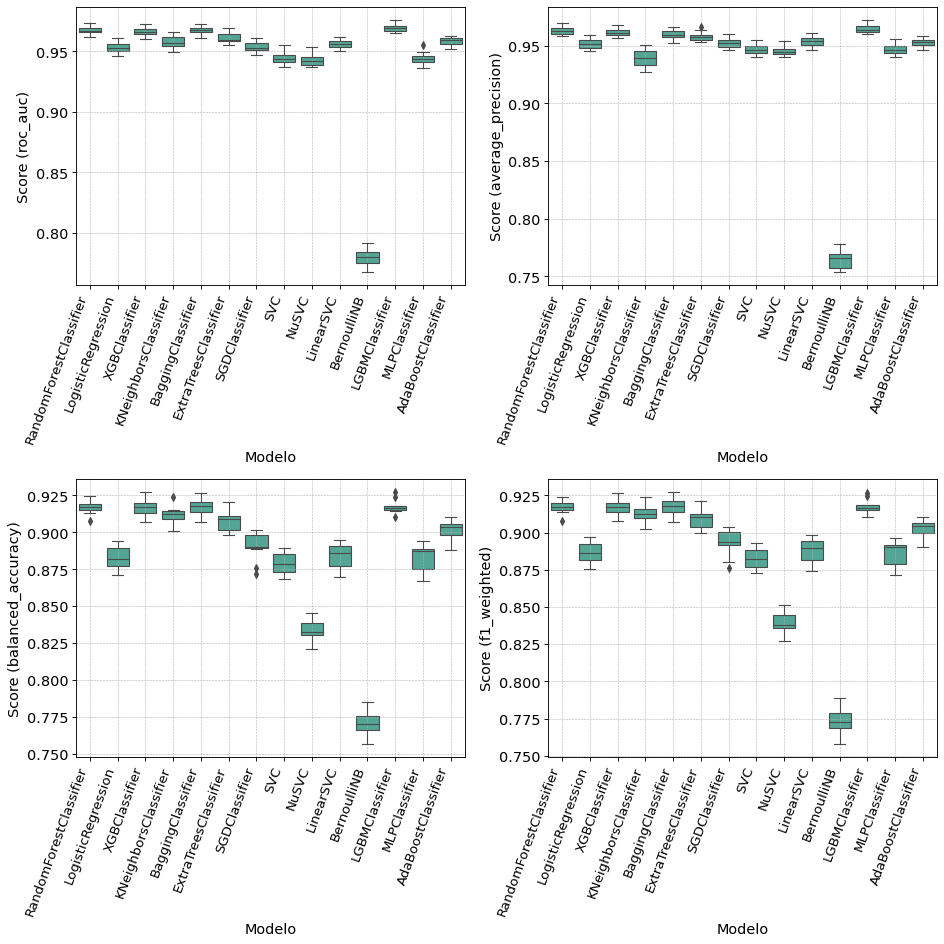

In [91]:
metricas = ['roc_auc', 'average_precision', 'balanced_accuracy', 'f1_weighted' ]

matplotlib.rcParams.update({'font.size': 13})
fig, axis = plt.subplots(2,2, figsize=(12, 12), dpi=80)

axis = np.ravel(axis)
for i, m in enumerate(metricas):
    df_score = pd.DataFrame({m: s for m, s in zip(df_results['Modelo'], df_results['RawScores'].apply(lambda x: x[m]))})
    df_score = pd.melt(df_score, var_name='Modelo', value_name='Score')
    sns.boxplot(x='Modelo', y='Score', data=df_score, color='#45B39D', linewidth=1, ax=axis[i])
    axis[i].set_xlabel('Modelo')
    axis[i].set_ylabel(f'Score ({m})')
    axis[i].set_xticklabels(labels=df_score['Modelo'].drop_duplicates(), rotation=70, ha='right', fontsize=12)
    axis[i].grid(which='major',linestyle='--', linewidth=0.5, )
    
plt.tight_layout()
plt.show()

# Tunning de Hiperparâmetros

In [94]:
%pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.0 MB/s 


In [97]:
from skopt import forest_minimize


def funcao_otimizacao(params):
    """
    Esta funcao recebe os hiperpâmetros selecionados pela função forest_minimize,
    instancia o RandomForestClassifier com os parâmetros recebidos e avalia o
    modelo com os dados de treino utilizando validação cruzada com 10 folds.
    """
    logging.info(params)
    n_estimators = params[0] 
    max_depth = params[1]
    min_samples_split = params[2]
    min_samples_leaf = params[3]
    max_samples = params[4]
    class_weight = {0: 1, 1: params[5]}
    
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_samples=max_samples,
                                 class_weight=class_weight,
                                 random_state=DEFAULT_RANDOM_STATE, 
                                 n_jobs=-1)
    rskfcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=DEFAULT_RANDOM_STATE)
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=rskfcv)
    return -np.mean(score)

space = [
    (200, 3000), # n_estimators
    (1, 10),     # max_depth
    (2, 20),     # min_samples_split
    (1, 20),     # min_samples_leaf
    (0.4, 1.),   # max_samples
    (2, 10),     # class_weight
]

N_CALLS = 50
pbar = tqdm.tqdm_notebook(total=N_CALLS)
def atualizar_progresso(res):
    pbar.update(1)
    
res = forest_minimize(funcao_otimizacao, space, random_state=DEFAULT_RANDOM_STATE, n_random_starts=10, n_calls=N_CALLS, verbose=1, n_jobs=N_JOBS, callback=atualizar_progresso)
pbar.close()

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration No: 1 started. Evaluating function at random point.
[2021-12-14 15:19:48,175][<ipython-input-97-c1a7a1440028>:funcao_otimizacao:10 INFO] [1060, 8, 8, 19, 0.45998494949080176, 9]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 358.0298
Function value obtained: -0.9674
Current minimum: -0.9674
Iteration No: 2 started. Evaluating function at random point.
[2021-12-14 15:25:46,208][<ipython-input-97-c1a7a1440028>:funcao_otimizacao:10 INFO] [330, 6, 3, 12, 0.9631316254094502, 3]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 150.1260
Function value obtained: -0.9653
Current minimum: -0.9674
Iteration No: 3 started. Evaluating function at random point.
[2021-12-14 15:28:16,333][<ipython-input-97-c1a7a1440028>:funcao_otimizacao:10 INFO] [1415, 5, 2, 12, 0.7669918962929686, 10]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 486.8053
Function value obtained: -0.9641
Current minimum: -0.9674
Iteration No: 4 started. Evaluati

In [98]:
res.x

[2533, 10, 6, 3, 0.43836075180741596, 9]

In [99]:
X_train.shape

(22400, 42)

In [100]:
X_test.shape

(9600, 42)

In [116]:
params = [2412, 6, 14, 5, 0.5006957711150638, 2]
# [2533, 10, 6, 3, 0.43836075180741596, 9]
params = res.x

n_estimators = params[0] 
max_depth = params[1]
min_samples_split = params[2]
min_samples_leaf = params[3]
max_samples = params[4]
class_weight = {0: 1, 1: params[5]}

model = RandomForestClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth,
                             min_samples_split=min_samples_split,
                             min_samples_leaf=min_samples_leaf,
                             max_samples=max_samples,
                             class_weight=class_weight,
                             random_state=DEFAULT_RANDOM_STATE, 
                             n_jobs=-1)

model.fit(X_train, y_train)

p = model.predict(X_test)

In [117]:
balanced_accuracy_score(y_test, p)

0.9185371441038508

In [118]:
accuracy_score(y_test, p)

0.9165625

In [119]:
f1_score(y_test, p)

0.9130953672561569

In [120]:
recall_score(y_test, p)

0.9456179775280898

In [121]:
precision_score(y_test, p)

0.882735473043843

In [122]:
accuracy_score(y_test, p)

0.9165625

In [123]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9725114868550234

In [124]:
pd.DataFrame(confusion_matrix(y_test, p), columns=['Predito como Falso','Predito como Verdadeiro'], index=['Falso', 'Verdadeiro'])

,Predito como Falso,Predito como Verdadeiro
Falso,4591,559
Verdadeiro,242,4208


In [125]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      5150
         1.0       0.88      0.95      0.91      4450

    accuracy                           0.92      9600
   macro avg       0.92      0.92      0.92      9600
weighted avg       0.92      0.92      0.92      9600



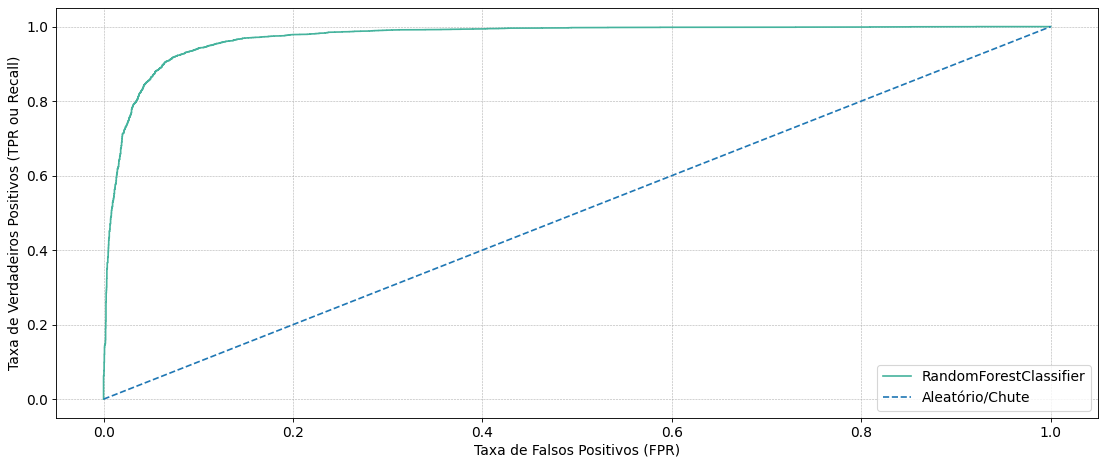

In [126]:
matplotlib.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(14, 6), dpi=80)
# plt.title(' Curva Característica de Operação do Receptor (ROC)')
lr_fpr, lr_tpr, thresholds =  roc_curve(y_test.values, model.predict_proba(X_test)[:,1], drop_intermediate=False, pos_label=1)
plt.plot(lr_fpr, lr_tpr, label='RandomForestClassifier',color='#45B39D')
plt.plot([0, 1], [0,1], linestyle='--', label='Aleatório/Chute')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR ou Recall)')
plt.legend()
plt.grid(which='major',linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [127]:
df_histograma = pd.Series(model.predict_proba(X_test)[:,1]).to_frame().rename(columns={0:'Score'})
df_histograma['Bins'] = pd.cut(df_histograma['Score'], bins=np.arange(0,1.05,0.05))
df_histograma['Y'] = y_test.values
df_histograma['Acertos Thr 0.5'] = df_histograma.apply(lambda x: 1 if (1 if x['Score']>=.5 else 0)==x['Y'] else 0,axis=1)

In [128]:
df_barplot = df_histograma[['Bins','Acertos Thr 0.5']].groupby(['Bins']).apply(lambda x: x['Acertos Thr 0.5'].sum()/x.shape[0]).fillna(0).to_frame().rename(columns={0: 'Acertos (%)'})
df_barplot['Contagem'] = df_histograma[['Bins','Acertos Thr 0.5']].groupby(['Bins']).count()
df_barplot = df_barplot.reset_index()
df_barplot['left'] = df_barplot['Bins'].apply(lambda x: x.left+0.025)

In [129]:
N = 20
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(.5,45/256, N)
vals[:, 1] = np.linspace(0, 179/256, N)
vals[:, 2] = np.linspace(0, 157/256, N)
newcmp = ListedColormap(vals)

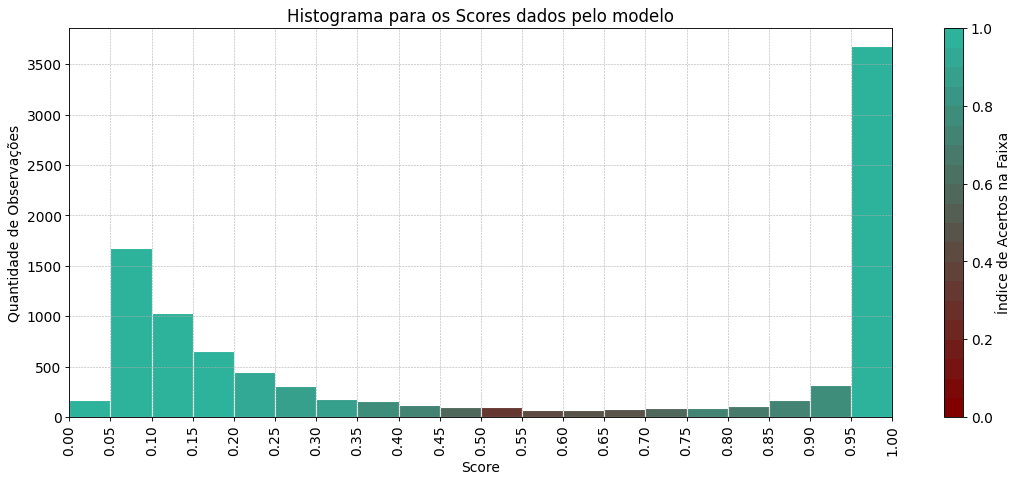

In [130]:
matplotlib.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(14, 6), dpi=80)
color='#45B39D'
scalarMappable = ScalarMappable(cmap=newcmp)
plt.bar(df_barplot['left'], df_barplot['Contagem'], width=0.05, color=scalarMappable.cmap(df_barplot['Acertos (%)']), alpha=1, linewidth=1, edgecolor='white')
colorbar = plt.colorbar(scalarMappable)
colorbar.set_label('Índice de Acertos na Faixa')
plt.xlim(0,1)
plt.grid(which='both',linestyle='--', linewidth=0.5)
plt.title('Histograma para os Scores dados pelo modelo')
plt.xlabel('Score')
plt.ylabel('Quantidade de Observações')
plt.tight_layout()
plt.xticks(ticks=np.arange(0,1.05, 0.05), rotation=90)
plt.show()